In [1]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.facecolor']='#00000000'
sns.set_style('darkgrid')

This dataset has two files containing the titles (titles.csv) and the cast (credits.csv) for the title.

This dataset contains +5k unique titles on Netflix with 15 columns containing their information, including:
TITLE data set
 id: The title ID on JustWatch.
 
 title: The name of the title.
 
 show_type: TV show or movie.
 
 description: A brief description.
 
 release_year: The release year.
 
 age_certification: The age certification.
 
 runtime: The length of the episode (SHOW) or movie.
 
 genres: A list of genres.
 
 production_countries: A list of countries that produced the title.
 
 seasons: Number of seasons if it's a SHOW.
 
 imdb_id: The title ID on IMDB.
 
 imdb_score: Score on IMDB.
 
 imdb_votes: Votes on IMDB.
 
 tmdb_popularity: Popularity on TMDB.
 
 tmdb_score: Score on TMDB.
And over +77k credits of actors and directors on Netflix titles with 5 columns containing their information, including:



Credits Data set
 
 person_ID: The person ID on JustWatch.
 
 id: The title ID on JustWatch.
 
 name: The actor or director's name.
 
 character_name: The character name.
 
 role: ACTOR or DIRECTOR.

## Reading the data sets

In [3]:
credits = pd.read_csv('D:/hmtl/credits.csv',header='infer')
titles=pd.read_csv('D:/hmtl/titles.csv',header='infer')

## Observing the data trends

Credits data

In [4]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77801 entries, 0 to 77800
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  77801 non-null  int64 
 1   id         77801 non-null  object
 2   name       77801 non-null  object
 3   character  68029 non-null  object
 4   role       77801 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.0+ MB


In [5]:
credits.isna().sum()

person_id       0
id              0
name            0
character    9772
role            0
dtype: int64

In [6]:
per = credits['character'].isna().sum()*100/credits['character'].count()
print(per)

14.364462214643755


14.3% of character frame consists of null data 

Titles Data

In [7]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

In [8]:
titles.isna().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

As there is noting much for now to explore in credits data will continue with titles data 

In [9]:
titles.head(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,73424.0,17.617,8.306
6,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,395024.0,17.770,7.800
7,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,"['thriller', 'action', 'crime']",['US'],NaN,tt0066999,7.7,155051.0,12.817,7.500
8,tm119281,Bonnie and Clyde,MOVIE,"In the 1930s, bored waitress Bonnie Parker fal...",1967,R,110,"['crime', 'drama', 'action']",['US'],NaN,tt0061418,7.7,112048.0,15.687,7.500
9,tm98978,The Blue Lagoon,MOVIE,Two small children and a ship's cook survive a...,1980,R,104,"['romance', 'action', 'drama']",['US'],NaN,tt0080453,5.8,69844.0,50.324,6.156


As we know that Netflix was founded in the year 1997 so exclude the data which contain year less than 1997

In [10]:
clean_tdf=titles[titles['release_year']>=1997]
clean_tdf.head(8)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
91,ts20981,Survivor,SHOW,A reality show contest where sixteen or more c...,2000,TV-PG,48,['reality'],['US'],42.0,tt0239195,7.4,24687.0,54.190,7.400
93,ts22176,Stargate SG-1,SHOW,The story of Stargate SG-1 begins about a year...,1997,TV-PG,44,"['scifi', 'drama', 'action']","['CA', 'US']",10.0,tt0118480,8.4,90196.0,88.851,8.300
95,ts21223,Pokémon,SHOW,"Join Ash accompanied by his partner Pikachu, a...",1997,TV-Y7,22,"['action', 'scifi', 'animation', 'comedy', 'fa...",['JP'],25.0,tt14053732,7.4,198.0,115.356,7.633
96,tm191013,Boogie Nights,MOVIE,"Set in 1977, back when sex was safe, pleasure ...",1997,R,156,['drama'],['US'],NaN,tt0118749,7.9,261563.0,20.436,7.600
98,tm25947,Snatch,MOVIE,"Unscrupulous boxing promoters, violent bookmak...",2000,R,103,"['crime', 'comedy']","['US', 'GB']",NaN,tt0208092,8.3,841435.0,25.203,7.800
99,tm43808,The Talented Mr. Ripley,MOVIE,Tom Ripley is a calculating young man who beli...,1999,R,139,"['thriller', 'drama', 'crime']",['US'],NaN,tt0134119,7.4,207524.0,13.780,7.200
100,ts20339,One Piece,SHOW,"Years ago, the fearsome Pirate King, Gol D. Ro...",1999,TV-14,23,"['animation', 'action', 'comedy', 'drama', 'fa...",['JP'],21.0,tt0388629,8.8,117129.0,143.457,8.764
101,ts5145,The Challenge,SHOW,Each Challenge pits numerous cast members from...,1998,TV-14,40,"['reality', 'comedy', 'drama', 'scifi']",['US'],37.0,tt6274074,7.8,3362.0,18.075,7.700


In [11]:
clean_tdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5696 entries, 91 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5696 non-null   object 
 1   title                 5695 non-null   object 
 2   type                  5696 non-null   object 
 3   description           5678 non-null   object 
 4   release_year          5696 non-null   int64  
 5   age_certification     3149 non-null   object 
 6   runtime               5696 non-null   int64  
 7   genres                5696 non-null   object 
 8   production_countries  5696 non-null   object 
 9   seasons               2081 non-null   float64
 10  imdb_id               5300 non-null   object 
 11  imdb_score            5221 non-null   float64
 12  imdb_votes            5205 non-null   float64
 13  tmdb_popularity       5605 non-null   float64
 14  tmdb_score            5391 non-null   float64
dtypes: float64(5), int64

As movies doesn't have seasons so making it as 0

In [12]:
clean_tdf.loc[clean_tdf['type'] == 'MOVIE', ['seasons']] = 0

In [13]:
clean_tdf.isna().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2547
runtime                    0
genres                     0
production_countries       0
seasons                    0
imdb_id                  396
imdb_score               475
imdb_votes               491
tmdb_popularity           91
tmdb_score               305
dtype: int64

Dorping the NAN values of the imdb_id,imdb_score,tmdb_popularity,tmdb_score,imdb_votes  

In [14]:
clean_tdf.dropna(subset=[ 'imdb_id','imdb_score','tmdb_popularity','tmdb_score','imdb_votes'],inplace=True)

In [15]:
clean_tdf.isna().sum()

id                         0
title                      0
type                       0
description                2
release_year               0
age_certification       2123
runtime                    0
genres                     0
production_countries       0
seasons                    0
imdb_id                    0
imdb_score                 0
imdb_votes                 0
tmdb_popularity            0
tmdb_score                 0
dtype: int64

Comparing the movies and show shares on the netflix 

In [16]:
types=clean_tdf['type'].value_counts()
print(types)

MOVIE    3150
SHOW     1839
Name: type, dtype: int64


In [17]:
types_per=clean_tdf['type'].value_counts()*100/clean_tdf['type'].count()
types_per

MOVIE    63.138906
SHOW     36.861094
Name: type, dtype: float64

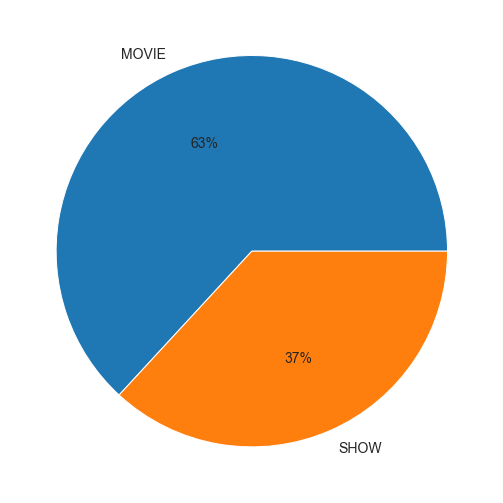

In [162]:
plt.figure(figsize=(9,9))
plt.pie(clean_tdf['type'].value_counts(),labels=['MOVIE','SHOW'],autopct='%.0f%%');

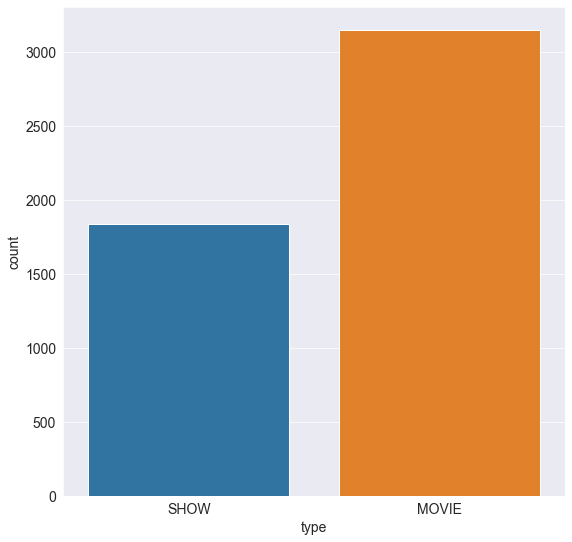

In [163]:
plt.figure(figsize=(9,9))
sns.countplot(x='type',data=clean_tdf);

From above two plots we can conclude that the number of Movies released in the Nextflix are greater than the Shows released

Now observing the contribution of different countries in netflix 

In [20]:
clean_tdf['production_countries'].value_counts()

['US']                                  1727
['IN']                                   520
['JP']                                   234
['GB']                                   189
['KR']                                   188
                                        ... 
['US', 'FR']                               1
['SG', 'GB', 'US']                         1
['GB', 'ID', 'CA', 'CN', 'SG', 'US']       1
['IR', 'US', 'FR']                         1
['PH', 'FO']                               1
Name: production_countries, Length: 406, dtype: int64

In [21]:
clean_tdf['production_countries'] = clean_tdf['production_countries'].str.replace(r"[", '').str.replace(r"'", '').str.replace(r"]", '')
clean_tdf['prod_country'] = clean_tdf['production_countries'].str.split(',').str[0]
clean_tdf.head(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,prod_country
91,ts20981,Survivor,SHOW,A reality show contest where sixteen or more c...,2000,TV-PG,48,['reality'],US,42.0,tt0239195,7.4,24687.0,54.190,7.400,US
93,ts22176,Stargate SG-1,SHOW,The story of Stargate SG-1 begins about a year...,1997,TV-PG,44,"['scifi', 'drama', 'action']","CA, US",10.0,tt0118480,8.4,90196.0,88.851,8.300,CA
95,ts21223,Pokémon,SHOW,"Join Ash accompanied by his partner Pikachu, a...",1997,TV-Y7,22,"['action', 'scifi', 'animation', 'comedy', 'fa...",JP,25.0,tt14053732,7.4,198.0,115.356,7.633,JP
96,tm191013,Boogie Nights,MOVIE,"Set in 1977, back when sex was safe, pleasure ...",1997,R,156,['drama'],US,0.0,tt0118749,7.9,261563.0,20.436,7.600,US
98,tm25947,Snatch,MOVIE,"Unscrupulous boxing promoters, violent bookmak...",2000,R,103,"['crime', 'comedy']","US, GB",0.0,tt0208092,8.3,841435.0,25.203,7.800,US
99,tm43808,The Talented Mr. Ripley,MOVIE,Tom Ripley is a calculating young man who beli...,1999,R,139,"['thriller', 'drama', 'crime']",US,0.0,tt0134119,7.4,207524.0,13.780,7.200,US
100,ts20339,One Piece,SHOW,"Years ago, the fearsome Pirate King, Gol D. Ro...",1999,TV-14,23,"['animation', 'action', 'comedy', 'drama', 'fa...",JP,21.0,tt0388629,8.8,117129.0,143.457,8.764,JP
101,ts5145,The Challenge,SHOW,Each Challenge pits numerous cast members from...,1998,TV-14,40,"['reality', 'comedy', 'drama', 'scifi']",US,37.0,tt6274074,7.8,3362.0,18.075,7.700,US
102,tm191110,Titanic,MOVIE,101-year-old Rose DeWitt Bukater tells the sto...,1997,PG-13,194,"['drama', 'romance']",US,0.0,tt0120338,7.9,1146825.0,155.683,7.878,US
103,ts34435,Cowboy Bebop,SHOW,"In 2071, roughly fifty years after an accident...",1998,TV-14,25,"['animation', 'action', 'scifi', 'western', 'c...",JP,1.0,tt0213338,8.9,115448.0,35.402,8.522,JP


In [22]:
clean_tdf['prod_country']=clean_tdf['prod_country'].replace('',np.nan)

Top 15 contributers of movies and shows in Netflix

In [23]:
top_countrys=clean_tdf['prod_country'].value_counts().head(15)
top_countrys=pd.DataFrame(top_countrys)
top_countrys

,prod_country
US,1837
IN,530
GB,256
JP,238
KR,190
ES,166
FR,153
CA,153
MX,101
BR,90


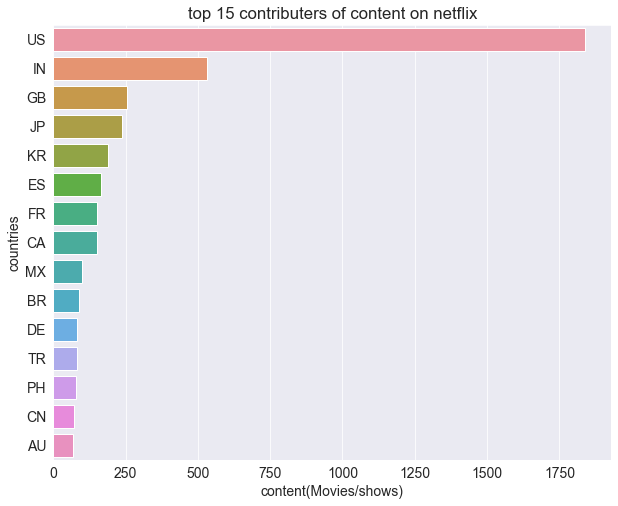

In [24]:
orders=top_countrys.index
plt.figure(figsize=(10,8))
plt.title("top 15 contributers of content on netflix")
sns.countplot(y=clean_tdf['prod_country'],order=orders);
plt.xlabel('content(Movies/shows)')
plt.ylabel('countries')
plt.show()

From above plot we can conclude that Maximum content is contributed by the US and followed by IN

Now we look at the genre and interpert the insights

In [25]:
clean_tdf['genres'].value_counts()

['comedy']                                                      417
['documentation']                                               238
['drama']                                                       217
['drama', 'romance']                                            114
['comedy', 'drama']                                             114
                                                               ... 
['crime', 'drama', 'thriller', 'romance', 'scifi', 'comedy']      1
['scifi', 'family', 'fantasy', 'drama']                           1
['thriller', 'horror', 'scifi']                                   1
['drama', 'crime', 'history', 'thriller']                         1
['animation', 'family', 'scifi']                                  1
Name: genres, Length: 1638, dtype: int64

There are multiple selection so we split them and add to data frame

In [26]:
clean_tdf['genres'] = clean_tdf['genres'].str.replace(r"[", '').str.replace(r"'", '').str.replace(r"]", '')
clean_tdf['unique_genre'] = clean_tdf['genres'].str.split(',').str[0]
clean_tdf.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,prod_country,unique_genre
91,ts20981,Survivor,SHOW,A reality show contest where sixteen or more c...,2000,TV-PG,48,reality,US,42.0,tt0239195,7.4,24687.0,54.190,7.400,US,reality
93,ts22176,Stargate SG-1,SHOW,The story of Stargate SG-1 begins about a year...,1997,TV-PG,44,"scifi, drama, action","CA, US",10.0,tt0118480,8.4,90196.0,88.851,8.300,CA,scifi
95,ts21223,Pokémon,SHOW,"Join Ash accompanied by his partner Pikachu, a...",1997,TV-Y7,22,"action, scifi, animation, comedy, fantasy, family",JP,25.0,tt14053732,7.4,198.0,115.356,7.633,JP,action
96,tm191013,Boogie Nights,MOVIE,"Set in 1977, back when sex was safe, pleasure ...",1997,R,156,drama,US,0.0,tt0118749,7.9,261563.0,20.436,7.600,US,drama
98,tm25947,Snatch,MOVIE,"Unscrupulous boxing promoters, violent bookmak...",2000,R,103,"crime, comedy","US, GB",0.0,tt0208092,8.3,841435.0,25.203,7.800,US,crime


In [27]:
clean_tdf['unique_genre'] = clean_tdf['unique_genre'].replace('',np.nan)

In [28]:
genre_count=pd.DataFrame(clean_tdf['unique_genre'].value_counts())
genre_count.head()

,unique_genre
drama,1211
comedy,1166
documentation,545
thriller,337
action,314


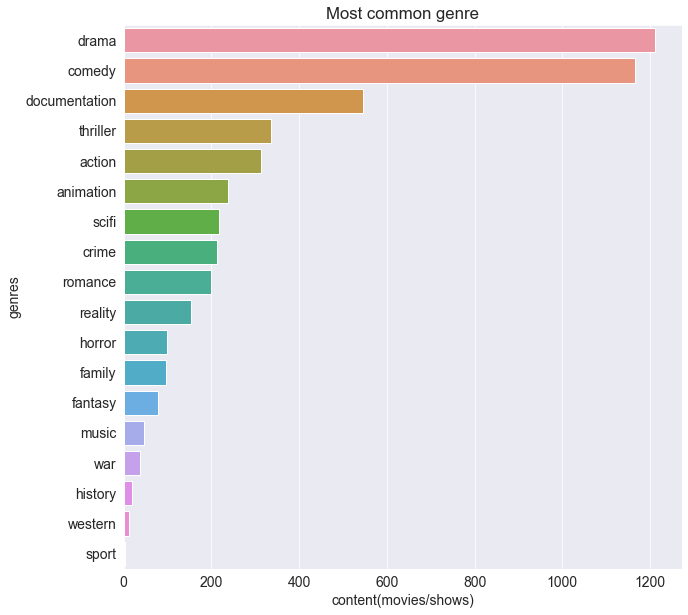

In [29]:
plt.figure(figsize=(10,10))
plt.title("Most common genre")
sns.countplot(y=clean_tdf['unique_genre'],order=genre_count.index);
plt.xlabel('content(movies/shows)')
plt.ylabel('genres')
plt.show()

By observing the plot we can conclude that the maximum content on the netflix is occupied by the Drama,Comedy and Documentation

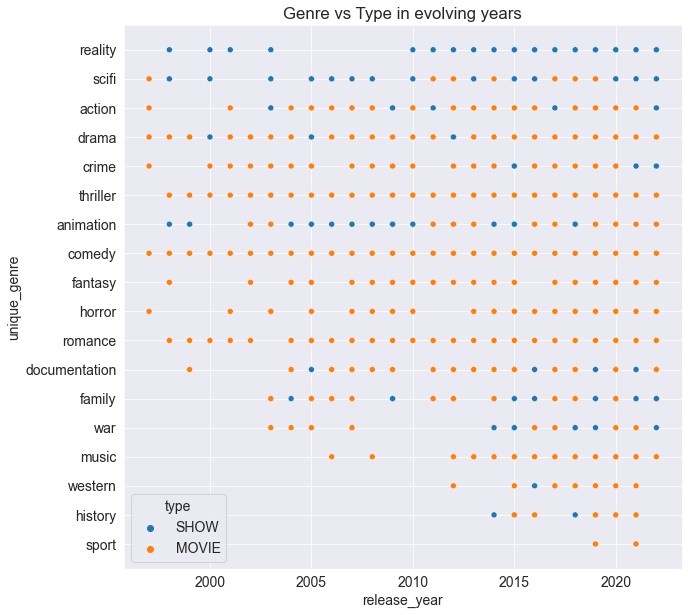

In [30]:
plt.figure(figsize=(10,10))
plt.title('Genre vs Type in evolving years')
sns.scatterplot(x='release_year',y='unique_genre',hue='type',data=clean_tdf,x_bins=10);

We can observe that the Movies have covered ever accepts of genre the Tv-Shows

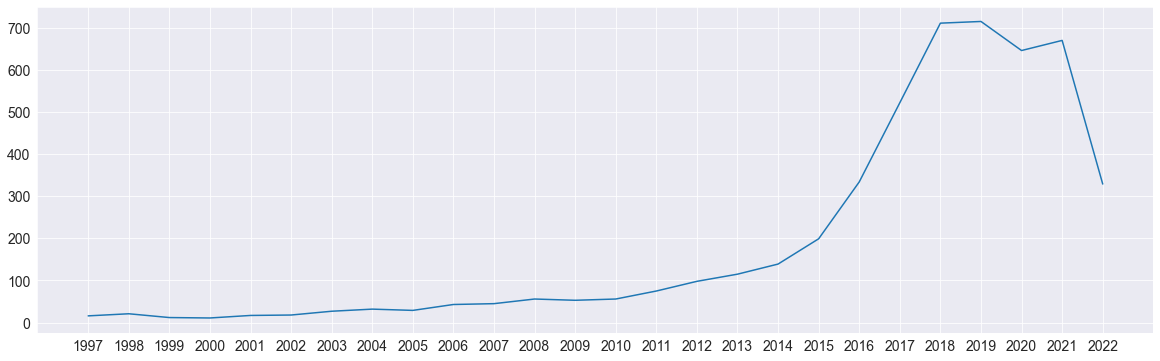

In [31]:
cdf=clean_tdf.groupby('release_year').count()
plt.figure(figsize=(20,6))
plt.plot(cdf.index,cdf.type)
plt.xticks(cdf.index)
plt.show()

As in the years 2018,2019 the more number of the Movies and Tv-Shows were add to Netflix 

In [32]:
movies_df=clean_tdf[clean_tdf['type']=='MOVIE']
shows_df=clean_tdf[clean_tdf['type']=='SHOW']

In [33]:
movies_df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,prod_country,unique_genre
96,tm191013,Boogie Nights,MOVIE,"Set in 1977, back when sex was safe, pleasure ...",1997,R,156,drama,US,0.0,tt0118749,7.9,261563.0,20.436,7.600,US,drama
98,tm25947,Snatch,MOVIE,"Unscrupulous boxing promoters, violent bookmak...",2000,R,103,"crime, comedy","US, GB",0.0,tt0208092,8.3,841435.0,25.203,7.800,US,crime
99,tm43808,The Talented Mr. Ripley,MOVIE,Tom Ripley is a calculating young man who beli...,1999,R,139,"thriller, drama, crime",US,0.0,tt0134119,7.4,207524.0,13.780,7.200,US,thriller
102,tm191110,Titanic,MOVIE,101-year-old Rose DeWitt Bukater tells the sto...,1997,PG-13,194,"drama, romance",US,0.0,tt0120338,7.9,1146825.0,155.683,7.878,US,drama
104,tm192037,Starship Troopers,MOVIE,"Set in the future, the story follows a young s...",1997,R,129,"scifi, action, thriller",US,0.0,tt0120201,7.3,291452.0,29.500,6.993,US,scifi


In [34]:
shows_df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,prod_country,unique_genre
91,ts20981,Survivor,SHOW,A reality show contest where sixteen or more c...,2000,TV-PG,48,reality,US,42.0,tt0239195,7.4,24687.0,54.190,7.400,US,reality
93,ts22176,Stargate SG-1,SHOW,The story of Stargate SG-1 begins about a year...,1997,TV-PG,44,"scifi, drama, action","CA, US",10.0,tt0118480,8.4,90196.0,88.851,8.300,CA,scifi
95,ts21223,Pokémon,SHOW,"Join Ash accompanied by his partner Pikachu, a...",1997,TV-Y7,22,"action, scifi, animation, comedy, fantasy, family",JP,25.0,tt14053732,7.4,198.0,115.356,7.633,JP,action
100,ts20339,One Piece,SHOW,"Years ago, the fearsome Pirate King, Gol D. Ro...",1999,TV-14,23,"animation, action, comedy, drama, fantasy",JP,21.0,tt0388629,8.8,117129.0,143.457,8.764,JP,animation
101,ts5145,The Challenge,SHOW,Each Challenge pits numerous cast members from...,1998,TV-14,40,"reality, comedy, drama, scifi",US,37.0,tt6274074,7.8,3362.0,18.075,7.700,US,reality


In [35]:
sa_df=pd.DataFrame(movies_df['age_certification'].value_counts())

In [36]:
ma_df=pd.DataFrame(shows_df['age_certification'].value_counts())

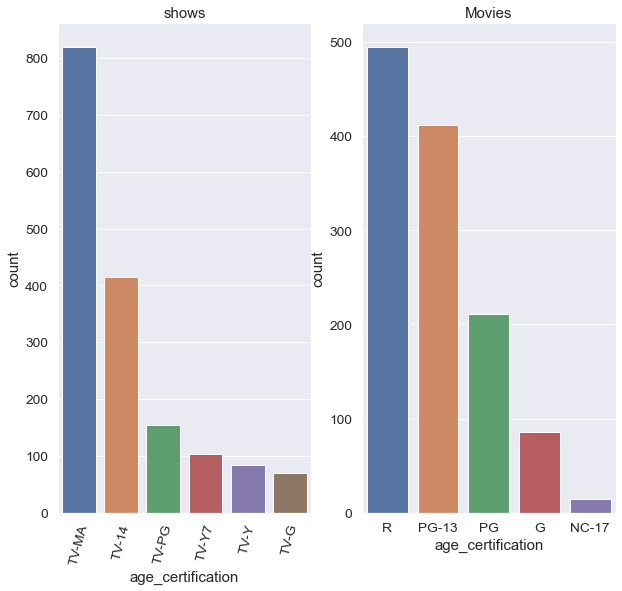

In [188]:
fig,axs=plt.subplots(1,2,figsize=(10,9))
plt.tight_layout(pad=50)
axs[0].set_title("shows")
axs[1].set_title('Movies')
sns.countplot('age_certification',data=shows_df,order=ma_df.index,ax=axs[0])
sns.countplot('age_certification',data=movies_df,order=sa_df.index,ax=axs[1])
axs[0].set_xticklabels(ma_df.index,rotation=75)
plt.show()

Most Tv shows are rated TV-MA where as Most movies are rated R

In [39]:
movies_df=movies_df.set_index('title')

In [40]:
movies_df.head()

,id,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,prod_country,unique_genre
title,,,,,,,,,,,,,,,,
Boogie Nights,tm191013,MOVIE,"Set in 1977, back when sex was safe, pleasure ...",1997,R,156,drama,US,0.0,tt0118749,7.9,261563.0,20.436,7.600,US,drama
Snatch,tm25947,MOVIE,"Unscrupulous boxing promoters, violent bookmak...",2000,R,103,"crime, comedy","US, GB",0.0,tt0208092,8.3,841435.0,25.203,7.800,US,crime
The Talented Mr. Ripley,tm43808,MOVIE,Tom Ripley is a calculating young man who beli...,1999,R,139,"thriller, drama, crime",US,0.0,tt0134119,7.4,207524.0,13.780,7.200,US,thriller
Titanic,tm191110,MOVIE,101-year-old Rose DeWitt Bukater tells the sto...,1997,PG-13,194,"drama, romance",US,0.0,tt0120338,7.9,1146825.0,155.683,7.878,US,drama
Starship Troopers,tm192037,MOVIE,"Set in the future, the story follows a young s...",1997,R,129,"scifi, action, thriller",US,0.0,tt0120201,7.3,291452.0,29.500,6.993,US,scifi


In [41]:
shows_df=shows_df.set_index('title')
shows_df.head()

,id,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,prod_country,unique_genre
title,,,,,,,,,,,,,,,,
Survivor,ts20981,SHOW,A reality show contest where sixteen or more c...,2000,TV-PG,48,reality,US,42.0,tt0239195,7.4,24687.0,54.190,7.400,US,reality
Stargate SG-1,ts22176,SHOW,The story of Stargate SG-1 begins about a year...,1997,TV-PG,44,"scifi, drama, action","CA, US",10.0,tt0118480,8.4,90196.0,88.851,8.300,CA,scifi
Pokémon,ts21223,SHOW,"Join Ash accompanied by his partner Pikachu, a...",1997,TV-Y7,22,"action, scifi, animation, comedy, fantasy, family",JP,25.0,tt14053732,7.4,198.0,115.356,7.633,JP,action
One Piece,ts20339,SHOW,"Years ago, the fearsome Pirate King, Gol D. Ro...",1999,TV-14,23,"animation, action, comedy, drama, fantasy",JP,21.0,tt0388629,8.8,117129.0,143.457,8.764,JP,animation
The Challenge,ts5145,SHOW,Each Challenge pits numerous cast members from...,1998,TV-14,40,"reality, comedy, drama, scifi",US,37.0,tt6274074,7.8,3362.0,18.075,7.700,US,reality


In [42]:
srating_df=pd.DataFrame(shows_df['imdb_score'].value_counts())
rating_df=pd.DataFrame(movies_df['imdb_score'].value_counts())

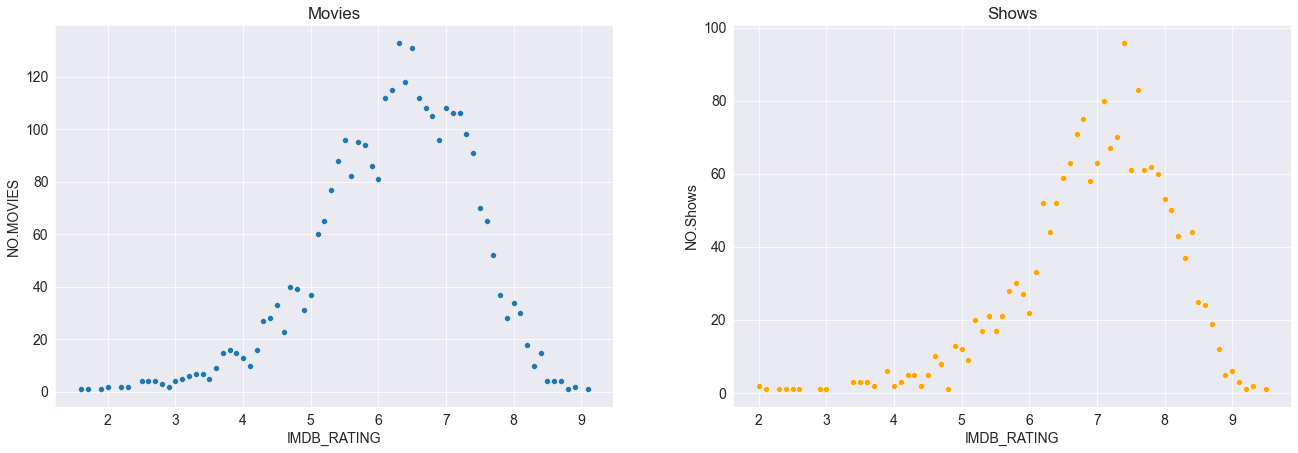

In [43]:
fig,axs=plt.subplots(1,2,figsize=(20,8))
plt.tight_layout(pad=6)
axs[0].set_title('Movies')
axs[1].set_title('Shows')
sns.scatterplot(x=rating_df.index,y=movies_df['imdb_score'].value_counts(),ax=axs[0])
sns.scatterplot(x=srating_df.index,y=shows_df['imdb_score'].value_counts(),ax=axs[1],color='orange')
axs[0].set_xlabel('IMDB_RATING')
axs[0].set_ylabel('NO.MOVIES')
axs[1].set_xlabel('IMDB_RATING')
axs[1].set_ylabel('NO.Shows')
plt.show()

In [44]:
cs_df=pd.DataFrame(shows_df.groupby('release_year').count())
cm_df=pd.DataFrame(movies_df.groupby('release_year').count())

Top 15 movies according to imdb rating and tmdb popularity

In [46]:
Mr_df=pd.DataFrame(movies_df['imdb_score'].sort_values(ascending=False).head(15))

In [47]:
Mp_df=pd.DataFrame(movies_df['tmdb_popularity'].sort_values(ascending=False).head(15))

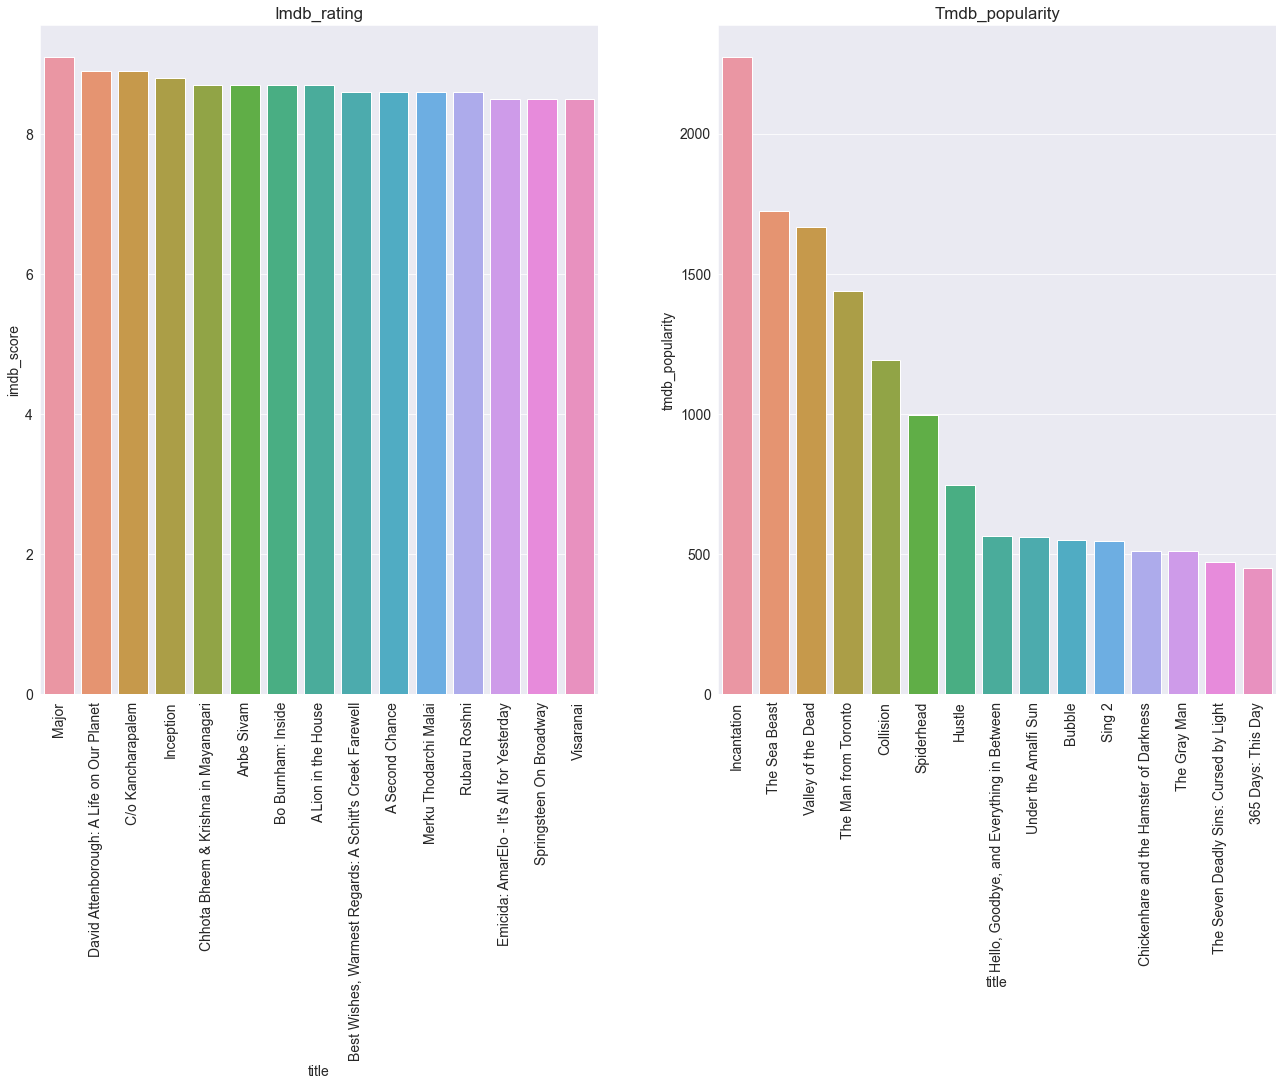

In [48]:
fig,axs=plt.subplots(1,2,figsize=(20,12))
plt.tight_layout(pad=6)
axs[0].set_title('Imdb_rating')
axs[1].set_title('Tmdb_popularity')
sns.barplot(x=Mr_df.index,y=movies_df['imdb_score'].sort_values(ascending=False).head(15),ax=axs[0])
sns.barplot(x=Mp_df.index,y=movies_df['tmdb_popularity'].sort_values(ascending=False).head(15),ax=axs[1])
axs[0].set_xticklabels(Mr_df.index,rotation=90)
axs[1].set_xticklabels(Mp_df.index,rotation=90)
plt.show()

Top 15 movies according to imdb rating and tmdb popularity

In [49]:
Sr_df=pd.DataFrame(shows_df['imdb_score'].sort_values(ascending=False).head(15))
Sp_df=pd.DataFrame(shows_df['tmdb_popularity'].sort_values(ascending=False).head(15))

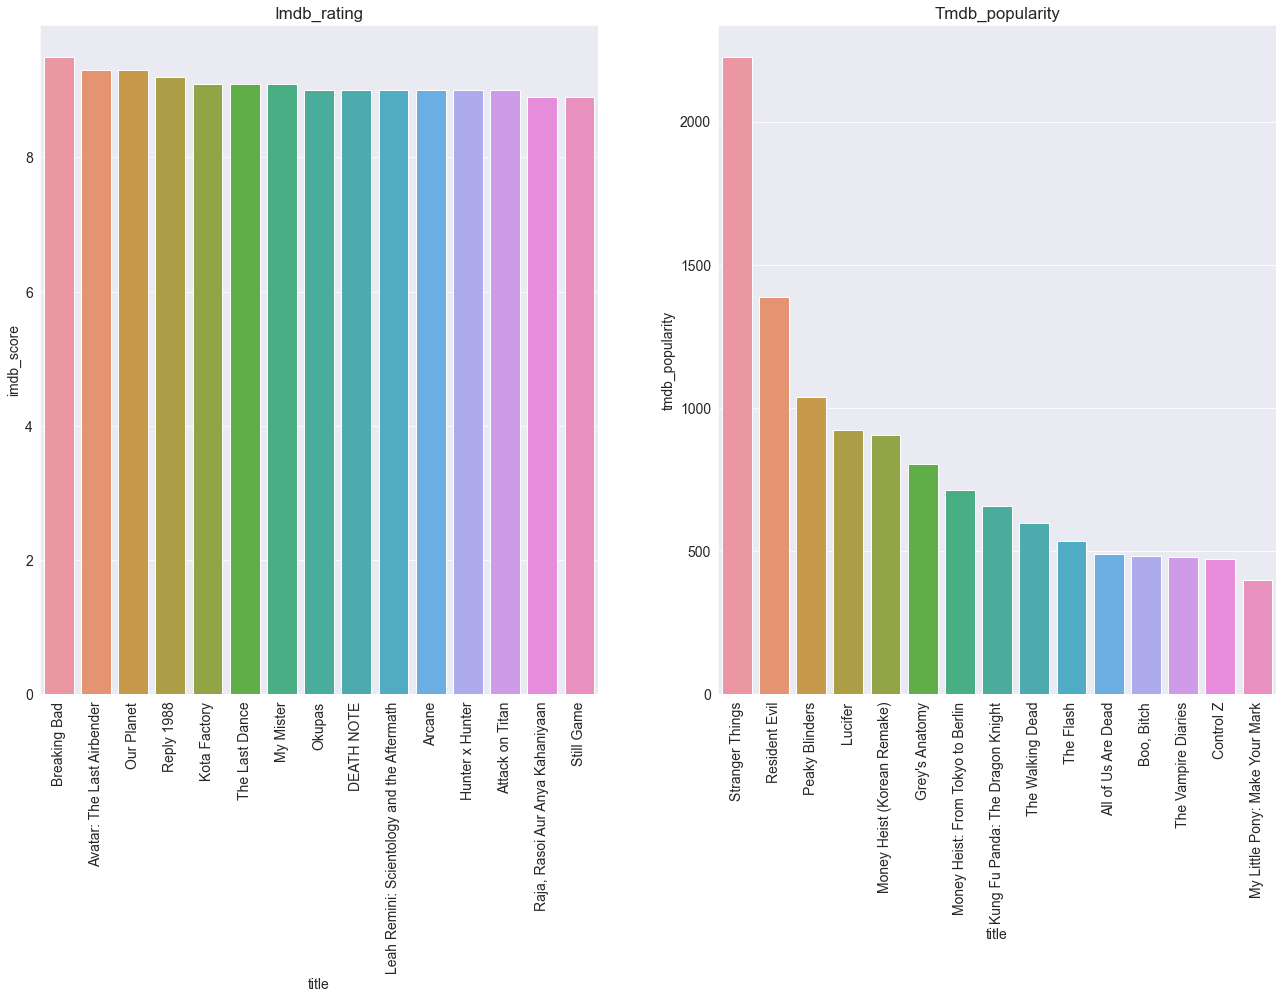

In [50]:
fig,axs=plt.subplots(1,2,figsize=(20,12))
plt.tight_layout(pad=6)
axs[0].set_title('Imdb_rating')
axs[1].set_title('Tmdb_popularity')
sns.barplot(x=Sr_df.index,y=shows_df['imdb_score'].sort_values(ascending=False).head(15),ax=axs[0])
sns.barplot(x=Sp_df.index,y=shows_df['tmdb_popularity'].sort_values(ascending=False).head(15),ax=axs[1])
axs[0].set_xticklabels(Sr_df.index,rotation=90)
axs[1].set_xticklabels(Sp_df.index,rotation=90)
plt.show()

Top 10 movies in India based on imdb_rating and tmdb_popularity

In [51]:
indian_df=movies_df[movies_df['prod_country']=='IN']
indian_shows=shows_df[shows_df['prod_country']=='IN']
indian_df.head()

,id,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,prod_country,unique_genre
title,,,,,,,,,,,,,,,,
Kuch Kuch Hota Hai,tm67635,MOVIE,Anjali is left heartbroken when her best frien...,1998,G,185,"romance, comedy, drama",IN,0.0,tt0172684,7.6,52036.0,12.350,7.7,IN,romance
Dil Se..,tm55100,MOVIE,Journalist Amar falls for a mysterious woman o...,1998,PG-13,163,"drama, romance",IN,0.0,tt0164538,7.5,28586.0,7.811,6.8,IN,drama
Mann,tm62176,MOVIE,A young woman falls in love with a handsome pl...,1999,NaN,174,"drama, romance",IN,0.0,tt0206921,6.1,5451.0,2.595,6.7,IN,drama
Soldier,tm52871,MOVIE,The story follows a young man (Bobby Deol) who...,1998,NaN,156,"thriller, action, drama, romance",IN,0.0,tt0211634,6.2,3063.0,3.623,5.7,IN,thriller
Hum Saath Saath Hain,tm62385,MOVIE,Ramkishen and his wife Mamta have three sons. ...,1999,G,177,"romance, family, fantasy, drama",IN,0.0,tt0216817,6.2,8552.0,7.865,6.0,IN,romance


In [52]:
IN_movies=indian_df['imdb_score'].sort_values(ascending=False).head(10)
IN_df=pd.DataFrame(IN_movies)
IN_df.head()

,imdb_score
title,
Major,9.1
C/o Kancharapalem,8.9
Chhota Bheem & Krishna in Mayanagari,8.7
Anbe Sivam,8.7
Rubaru Roshni,8.6


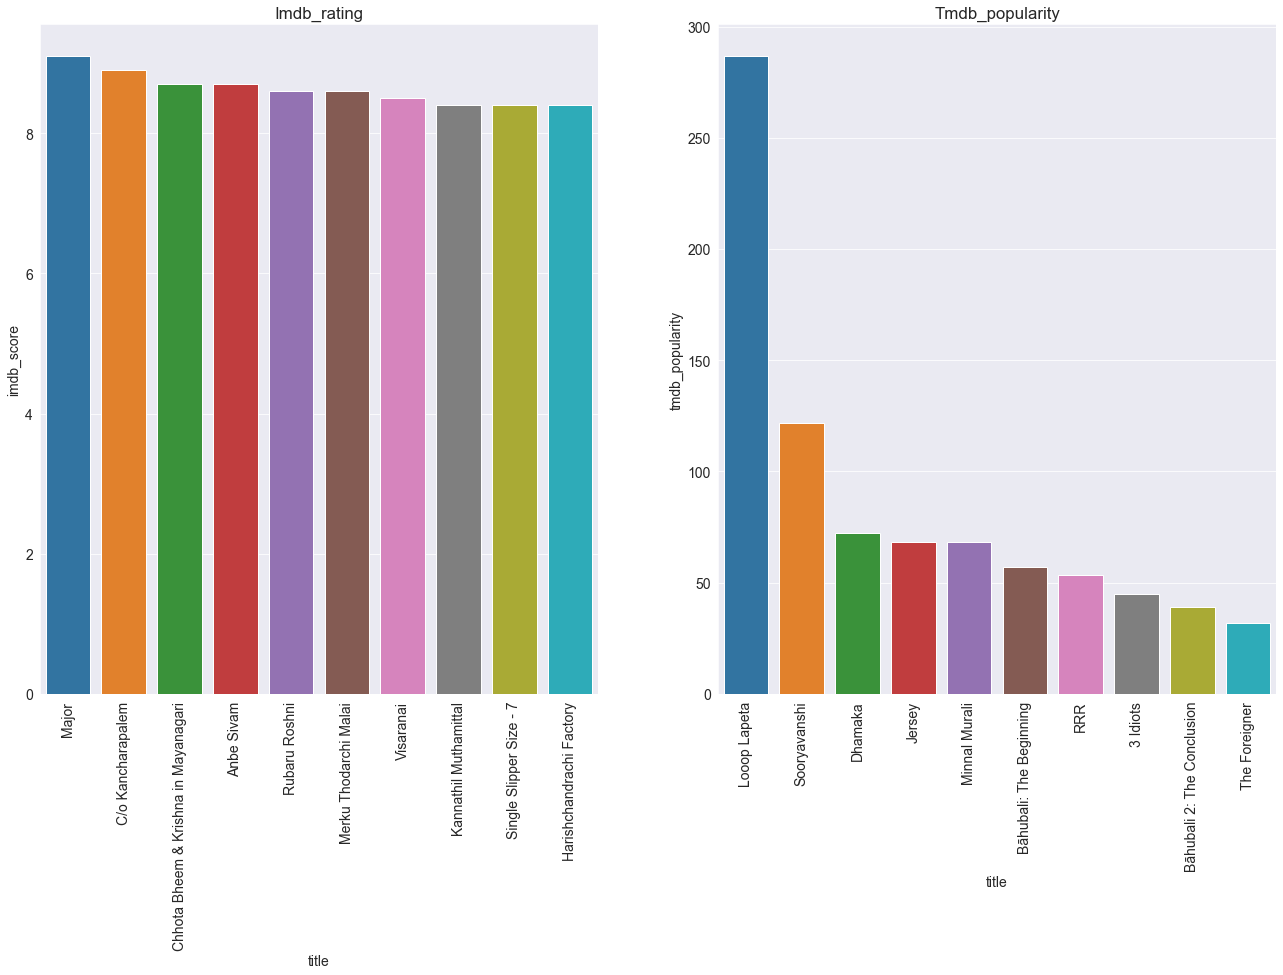

In [53]:
fig,axs=plt.subplots(1,2,figsize=(20,12))
plt.tight_layout(pad=6)
axs[0].set_title('Imdb_rating')
axs[1].set_title('Tmdb_popularity')
sns.barplot(x=IN_df.index,y=IN_movies,ax=axs[0])
sns.barplot(x=pd.DataFrame(indian_df['tmdb_popularity'].sort_values(ascending=False).head(10)).index,y=indian_df['tmdb_popularity'].sort_values(ascending=False).head(10),ax=axs[1])
axs[0].set_xticklabels(IN_df.index,rotation=90)
axs[1].set_xticklabels(pd.DataFrame(indian_df['tmdb_popularity'].sort_values(ascending=False).head(10)).index,rotation=90)
plt.show()

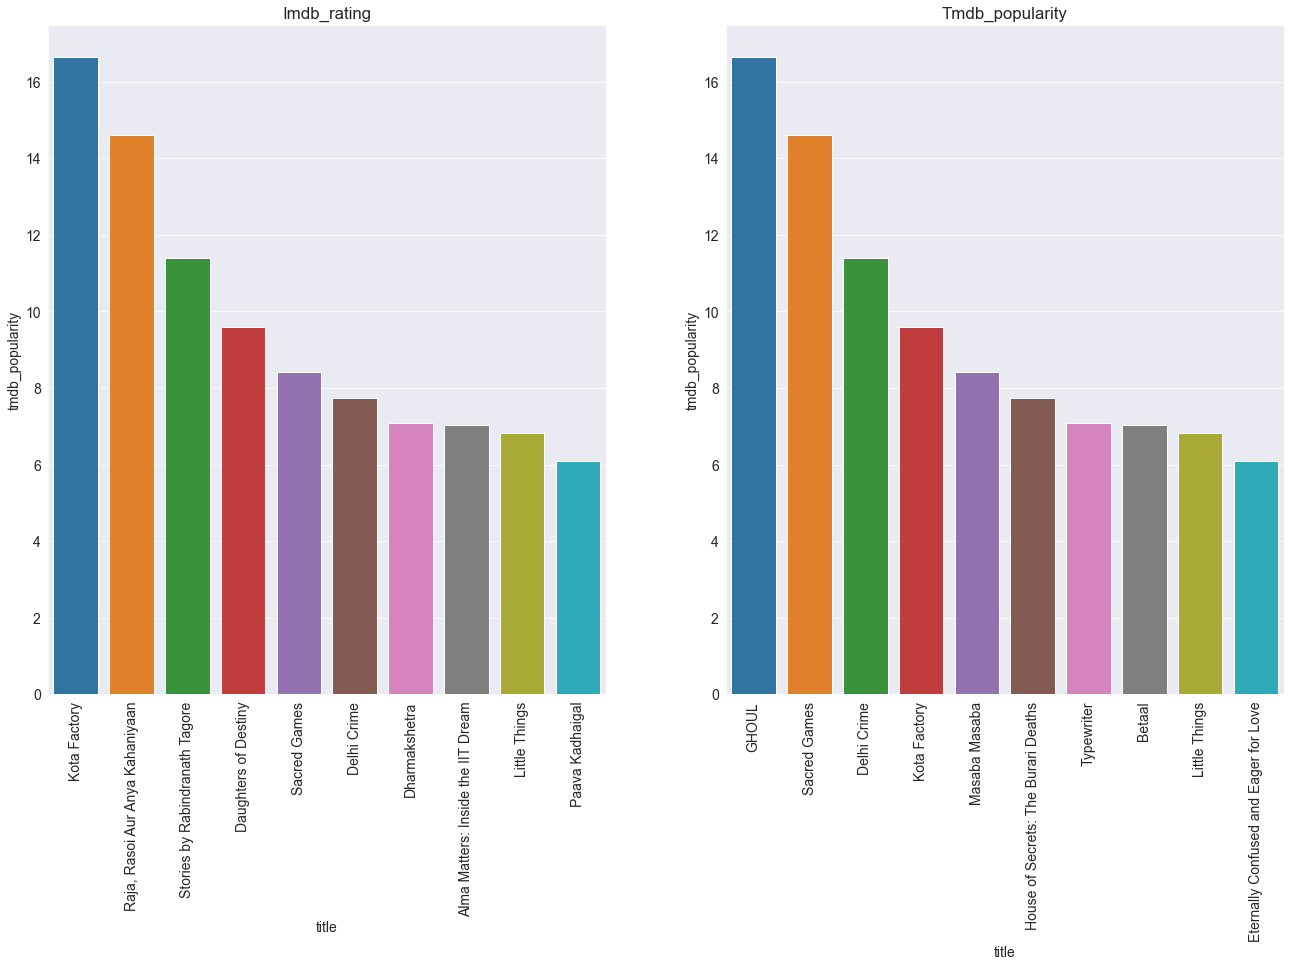

In [54]:
fig,axs=plt.subplots(1,2,figsize=(20,12))
plt.tight_layout(pad=6)
axs[0].set_title('Imdb_rating')
axs[1].set_title('Tmdb_popularity')
sns.barplot(x=pd.DataFrame(indian_shows['imdb_score'].sort_values(ascending=False).head(10)).index,y=indian_shows['tmdb_popularity'].sort_values(ascending=False).head(10),ax=axs[0])
sns.barplot(x=pd.DataFrame(indian_shows['tmdb_popularity'].sort_values(ascending=False).head(10)).index,y=indian_shows['tmdb_popularity'].sort_values(ascending=False).head(10),ax=axs[1])
axs[0].set_xticklabels(pd.DataFrame(indian_shows['imdb_score'].sort_values(ascending=False).head(10)).index,rotation=90)
axs[1].set_xticklabels(pd.DataFrame(indian_shows['tmdb_popularity'].sort_values(ascending=False).head(10)).index,rotation=90)
plt.show()

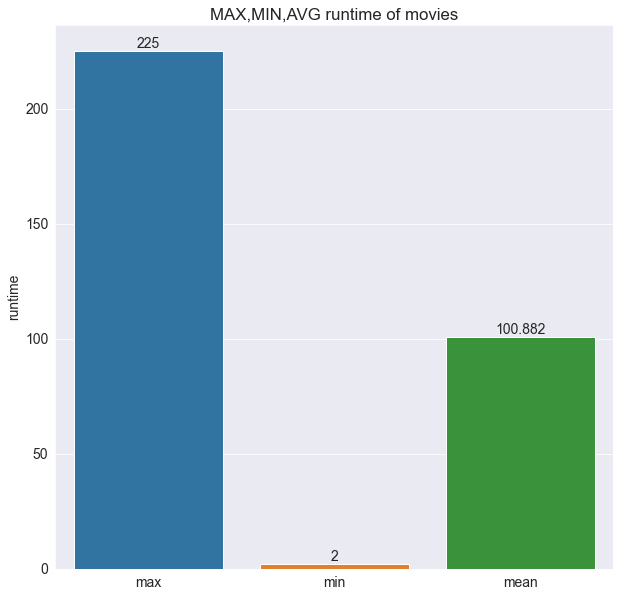

In [79]:
mrun_df=pd.DataFrame(movies_df['runtime'].describe())
plt.figure(figsize=(10,10))
plt.title('MAX,MIN,AVG runtime of movies')
ax=sns.barplot(x=mrun_df.index,y=mrun_df['runtime'],order=['max','min','mean'],errwidth=0)
ax.bar_label(ax.containers[0])
plt.show()

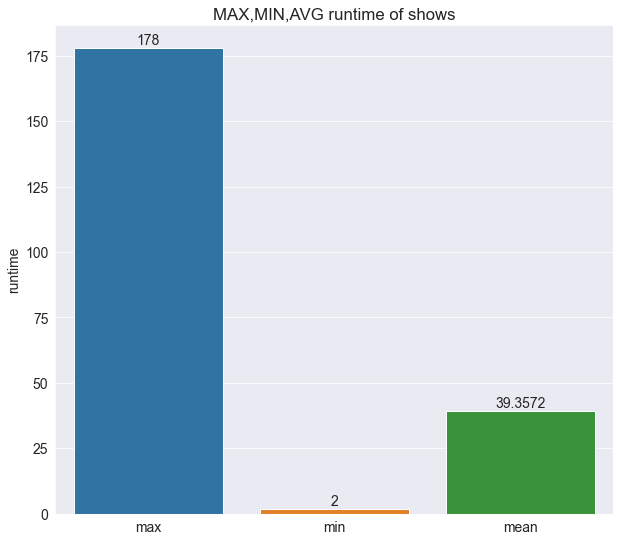

In [80]:
srun_df=pd.DataFrame(shows_df[shows_df['runtime']>0]['runtime'].describe())
plt.figure(figsize=(10,9))
plt.title('MAX,MIN,AVG runtime of shows')
ax=sns.barplot(x=srun_df.index,y=srun_df['runtime'],order=['max','min','mean'])
ax.bar_label(ax.containers[0])
plt.show()

# #Merging the datasets on id

In [69]:
merged_df=credits.merge(titles,on='id')
merged_df.head()

,person_id,id,name,character,role,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,7064,tm84618,Albert Brooks,Tom,ACTOR,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179


In [15]:
merged_df.shape

(77801, 19)

In [70]:
merged_df.isna().sum()

person_id                   0
id                          0
name                        0
character                9772
role                        0
title                       1
type                        0
description                38
release_year                0
age_certification       31143
runtime                     0
genres                      0
production_countries        0
seasons                 63091
imdb_id                  3499
imdb_score               3950
imdb_votes               4037
tmdb_popularity            11
tmdb_score               1137
dtype: int64

Droping the Age_certification and character coloums 

In [71]:
merged_df=merged_df.drop(['character','age_certification'],axis=1)

In [73]:
merged_df['production_countries'] = merged_df['production_countries'].str.replace(r"[", '').str.replace(r"'", '').str.replace(r"]", '')
merged_df['prod_country'] = merged_df['production_countries'].str.split(',').str[0]
merged_df['prod_country']=merged_df['prod_country'].replace('',np.nan)
merged_df=merged_df.drop('production_countries',axis=1)

In [74]:
merged_df['genres'] = merged_df['genres'].str.replace(r"[", '').str.replace(r"'", '').str.replace(r"]", '')
merged_df['genre'] = merged_df['genres'].str.split(',').str[0]
merged_df['genre']=merged_df['genre'].replace('',np.nan)
merged_df.head()

,person_id,id,name,role,title,type,description,release_year,runtime,genres,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,prod_country,genre
0,3748,tm84618,Robert De Niro,ACTOR,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,114,"drama, crime",NaN,tt0075314,8.2,808582.0,40.965,8.179,US,drama
1,14658,tm84618,Jodie Foster,ACTOR,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,114,"drama, crime",NaN,tt0075314,8.2,808582.0,40.965,8.179,US,drama
2,7064,tm84618,Albert Brooks,ACTOR,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,114,"drama, crime",NaN,tt0075314,8.2,808582.0,40.965,8.179,US,drama
3,3739,tm84618,Harvey Keitel,ACTOR,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,114,"drama, crime",NaN,tt0075314,8.2,808582.0,40.965,8.179,US,drama
4,48933,tm84618,Cybill Shepherd,ACTOR,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,114,"drama, crime",NaN,tt0075314,8.2,808582.0,40.965,8.179,US,drama


Movies has no seasons so marking it as 0

In [75]:
merged_df.loc[merged_df['type'] == 'MOVIE', ['seasons']] = 0
merged_df.head()

,person_id,id,name,role,title,type,description,release_year,runtime,genres,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,prod_country,genre
0,3748,tm84618,Robert De Niro,ACTOR,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,114,"drama, crime",0.0,tt0075314,8.2,808582.0,40.965,8.179,US,drama
1,14658,tm84618,Jodie Foster,ACTOR,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,114,"drama, crime",0.0,tt0075314,8.2,808582.0,40.965,8.179,US,drama
2,7064,tm84618,Albert Brooks,ACTOR,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,114,"drama, crime",0.0,tt0075314,8.2,808582.0,40.965,8.179,US,drama
3,3739,tm84618,Harvey Keitel,ACTOR,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,114,"drama, crime",0.0,tt0075314,8.2,808582.0,40.965,8.179,US,drama
4,48933,tm84618,Cybill Shepherd,ACTOR,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,114,"drama, crime",0.0,tt0075314,8.2,808582.0,40.965,8.179,US,drama


In [76]:
merged_df.isna().sum()

person_id             0
id                    0
name                  0
role                  0
title                 1
type                  0
description          38
release_year          0
runtime               0
genres                0
seasons               0
imdb_id            3499
imdb_score         3950
imdb_votes         4037
tmdb_popularity      11
tmdb_score         1137
prod_country        729
genre               117
dtype: int64

In [81]:
merged_df.dropna(subset=['imdb_id','imdb_score','tmdb_popularity','tmdb_score','imdb_votes'],inplace=True)

In [160]:
merged_df.isna().sum()

person_id            0
id                   0
name                 0
role                 0
title                0
type                 0
description         21
release_year         0
runtime              0
genres               0
seasons              0
imdb_id              0
imdb_score           0
imdb_votes           0
tmdb_popularity      0
tmdb_score           0
prod_country       485
genre                2
dtype: int64

In [85]:
merged_df.head()

,person_id,id,name,role,title,type,description,release_year,runtime,genres,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,prod_country,genre
0,3748,tm84618,Robert De Niro,ACTOR,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,114,"drama, crime",0.0,tt0075314,8.2,808582.0,40.965,8.179,US,drama
1,14658,tm84618,Jodie Foster,ACTOR,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,114,"drama, crime",0.0,tt0075314,8.2,808582.0,40.965,8.179,US,drama
2,7064,tm84618,Albert Brooks,ACTOR,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,114,"drama, crime",0.0,tt0075314,8.2,808582.0,40.965,8.179,US,drama
3,3739,tm84618,Harvey Keitel,ACTOR,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,114,"drama, crime",0.0,tt0075314,8.2,808582.0,40.965,8.179,US,drama
4,48933,tm84618,Cybill Shepherd,ACTOR,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,114,"drama, crime",0.0,tt0075314,8.2,808582.0,40.965,8.179,US,drama


Top 15 Director with Maximum Number of Movies and shows

In [112]:
dirt=merged_df[merged_df['role']=='DIRECTOR'].groupby('name').count()['title'].sort_values(ascending=False).head(15)
dirt_df=pd.DataFrame(dirt)

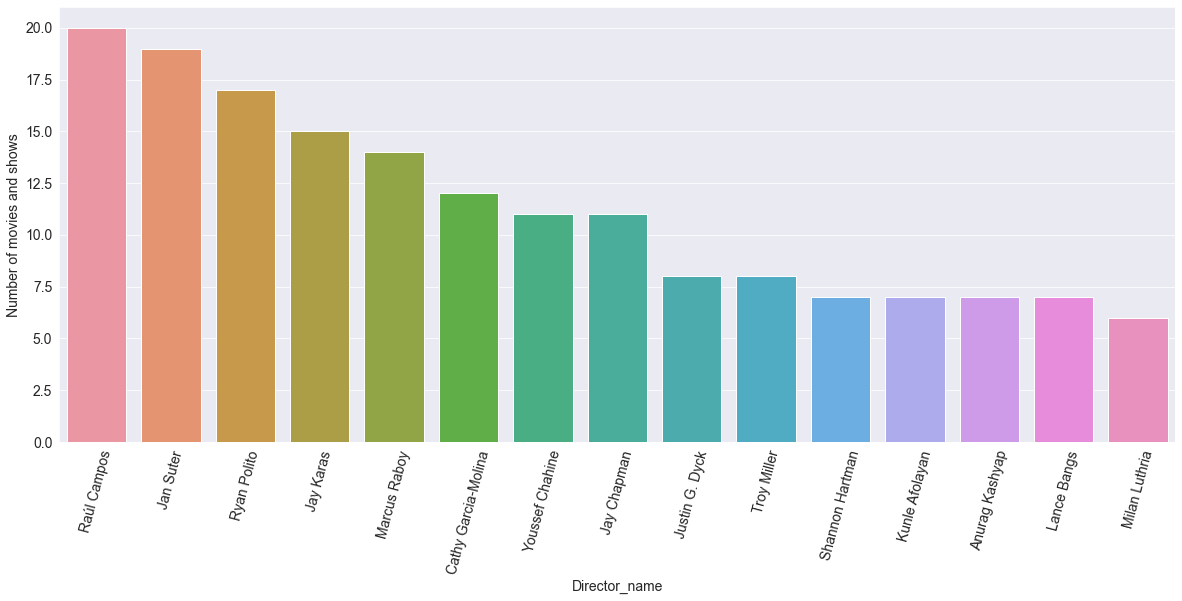

In [103]:
plt.figure(figsize=(20,8))
sns.barplot(x=dirt_df.index,y=dirt_df.title)
plt.xticks(rotation=75);
plt.xlabel('Director_name')
plt.ylabel('Number of movies and shows');

Top 15 Actors with Maximum Number of Movies and shows

In [108]:
Actr=merged_df[merged_df['role']=='ACTOR'].groupby('name').count()['title'].sort_values(ascending=False).head(15)
Actr_df=pd.DataFrame(Actr)

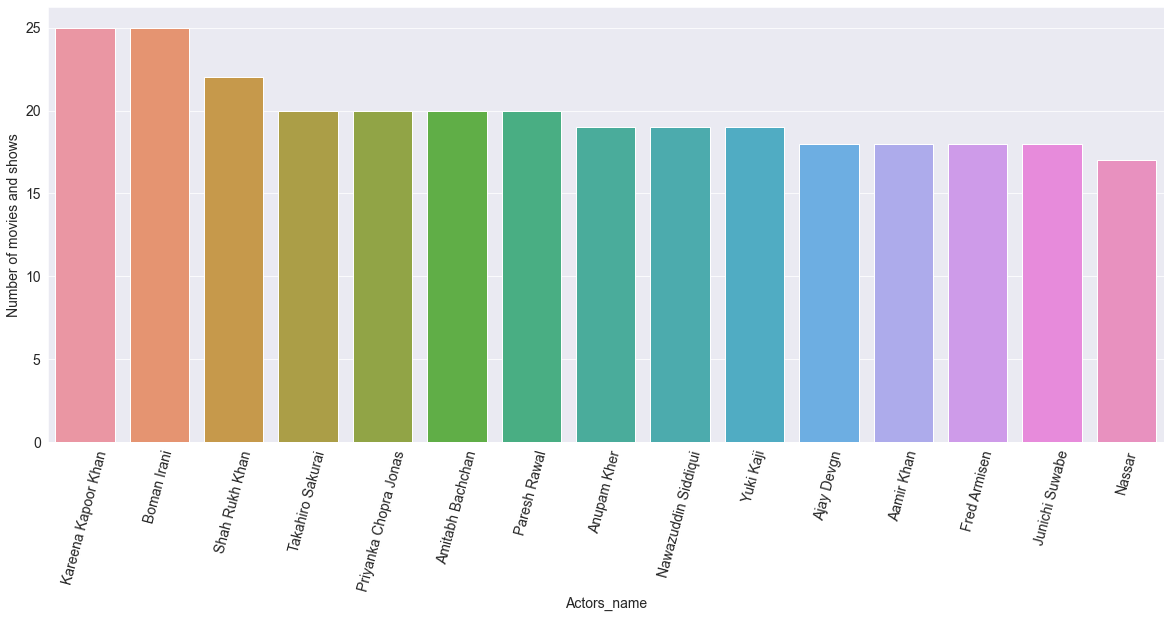

In [109]:
plt.figure(figsize=(20,8))
sns.barplot(x=Actr_df.index,y=Actr_df.title)
plt.xticks(rotation=75);
plt.xlabel('Actors_name')
plt.ylabel('Number of movies and shows');

Dividing the dataframe based on type

In [119]:
SA_df=pd.DataFrame(merged_df[merged_df['type']=='SHOW'][merged_df['role']=='ACTOR'].groupby('name').count()['title'].sort_valubes(ascending=False).head(10))
SD_df=pd.DataFrame(merged_df[merged_df['type']=='SHOW'][merged_df['role']=='DIRECTOR'].groupby('name').count()['title'].sort_values(ascending=False).head(10)
)

Top 10 Actors and Directors Based Quantity

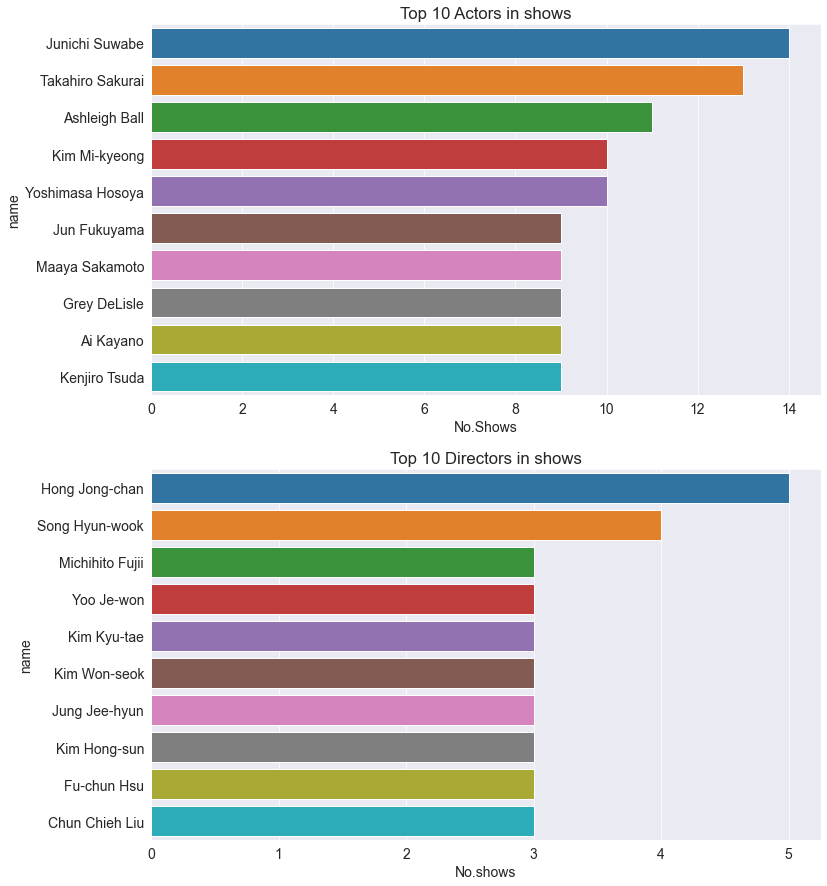

In [123]:
fig,ax=plt.subplots(2,1,figsize=(12,15))
ax[0].set_title('Top 10 Actors in shows')
ax[1].set_title('Top 10 Directors in shows')
sns.barplot(x=SA_df['title'],y=SA_df.index,ax=ax[0])
sns.barplot(x=SD_df['title'],y=SD_df.index,ax=ax[1]);
ax[0].set_xlabel('No.Shows')
ax[1].set_xlabel("No.shows");

In [124]:
MA_df=pd.DataFrame(merged_df[merged_df['type']=='MOVIE'][merged_df['role']=='ACTOR'].groupby('name').count()['title'].sort_values(ascending=False).head(10))
MD_df=pd.DataFrame(merged_df[merged_df['type']=='MOVIE'][merged_df['role']=='DIRECTOR'].groupby('name').count()['title'].sort_values(ascending=False).head(10)
)

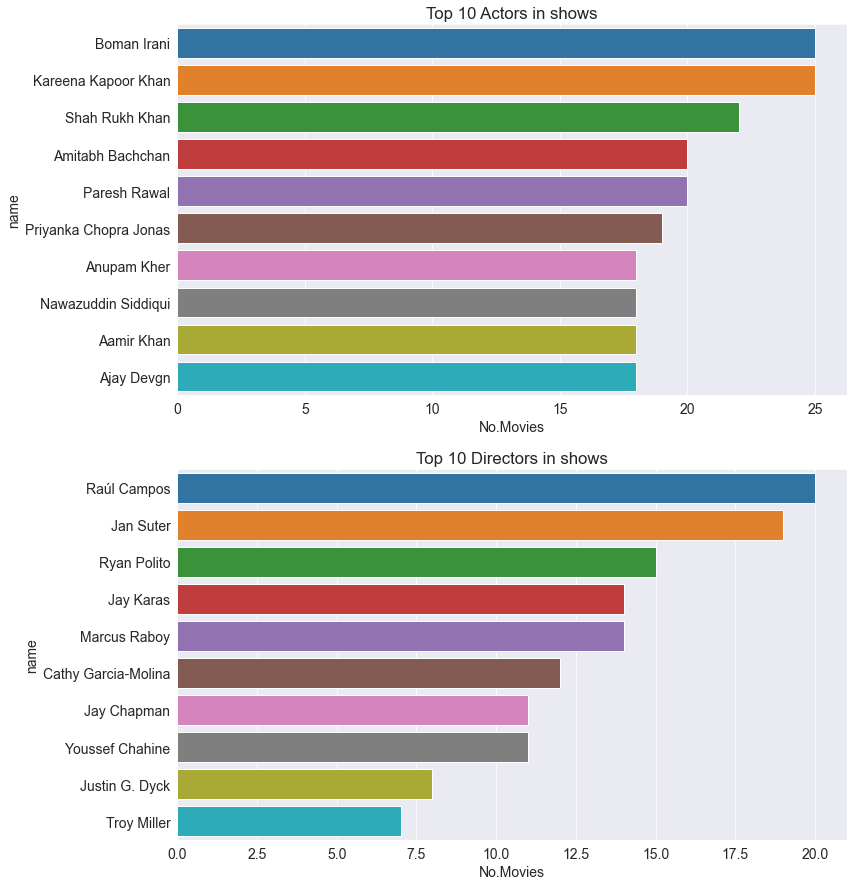

In [125]:
fig,ax=plt.subplots(2,1,figsize=(12,15))
ax[0].set_title('Top 10 Actors in shows')
ax[1].set_title('Top 10 Directors in shows')
sns.barplot(x=MA_df['title'],y=MA_df.index,ax=ax[0])
sns.barplot(x=MD_df['title'],y=MD_df.index,ax=ax[1]);
ax[0].set_xlabel('No.Movies')
ax[1].set_xlabel("No.Movies");

Succesful Actors and Directors In Movies and Shows

In [ ]:
MA_df=pd.DataFrame(merged_df[merged_df['type']=='MOVIE' & merged_df['imdb_score']>8][merged_df['role']=='ACTOR'].groupby('name').count()['title'].sort_values(ascending=False).head(10))
MD_df=pd.DataFrame(merged_df[merged_df['type']=='MOVIE' & merged_df['imdb_score']>8][merged_df['role']=='DIRECTOR'].groupby('name').count()['title'].sort_values(ascending=False).head(10)
)

In [138]:
df=merged_df[merged_df['type']=='MOVIE']


In [137]:
LA_df=pd.DataFrame(df[df['imdb_score']>8][df['role']=='ACTOR'].groupby('name').count()['title'].sort_values(ascending=False).head(10))
LD_df=pd.DataFrame(df[df['imdb_score']>8][df['role']=='DIRECTOR'].groupby('name').count()['title'].sort_values(ascending=False).head(10)
)

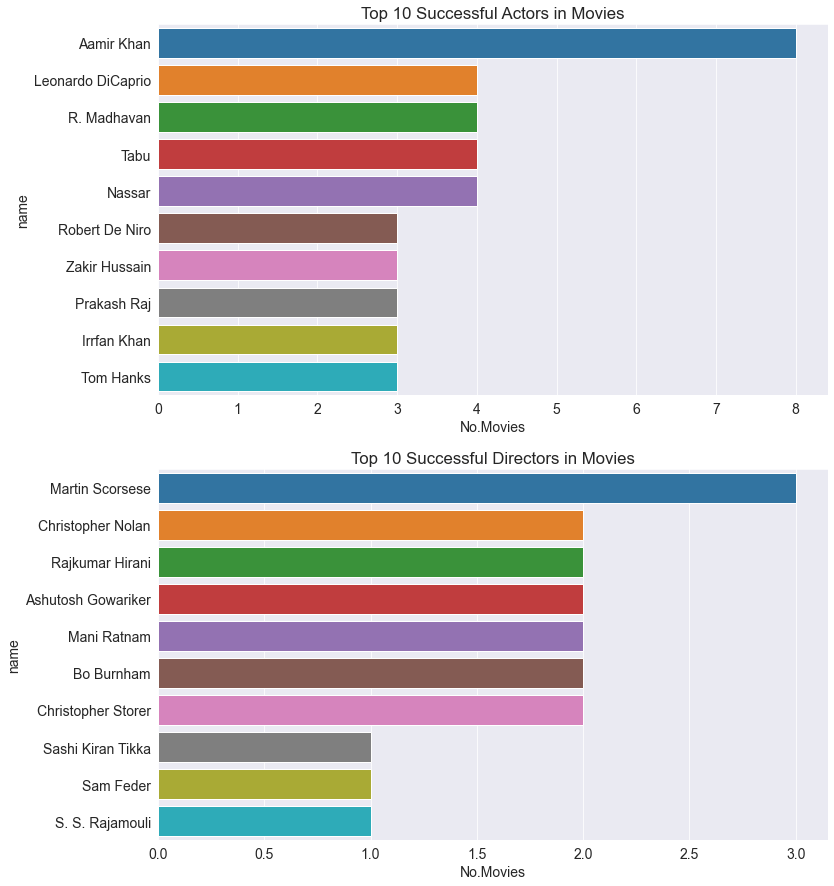

In [140]:
fig,ax=plt.subplots(2,1,figsize=(12,15))
ax[0].set_title('Top 10 Successful Actors in Movies')
ax[1].set_title('Top 10 Successful Directors in Movies')
sns.barplot(x=LA_df['title'],y=LA_df.index,ax=ax[0])
sns.barplot(x=LD_df['title'],y=LD_df.index,ax=ax[1]);
ax[0].set_xlabel('No.Movies')
ax[1].set_xlabel("No.Movies");

In [161]:
sdf=merged_df[merged_df['type']=='SHOW']


In [156]:
ssA_df=pd.DataFrame(sdf[sdf['imdb_score']>8][sdf['role']=='ACTOR'].groupby('name').count()['title'].sort_values(ascending=False).head(10))
ssD_df=pd.DataFrame(sdf[sdf['imdb_score']>8][sdf['role']=='DIRECTOR'].groupby('name').count()['title'].sort_values(ascending=False).head(10)
)

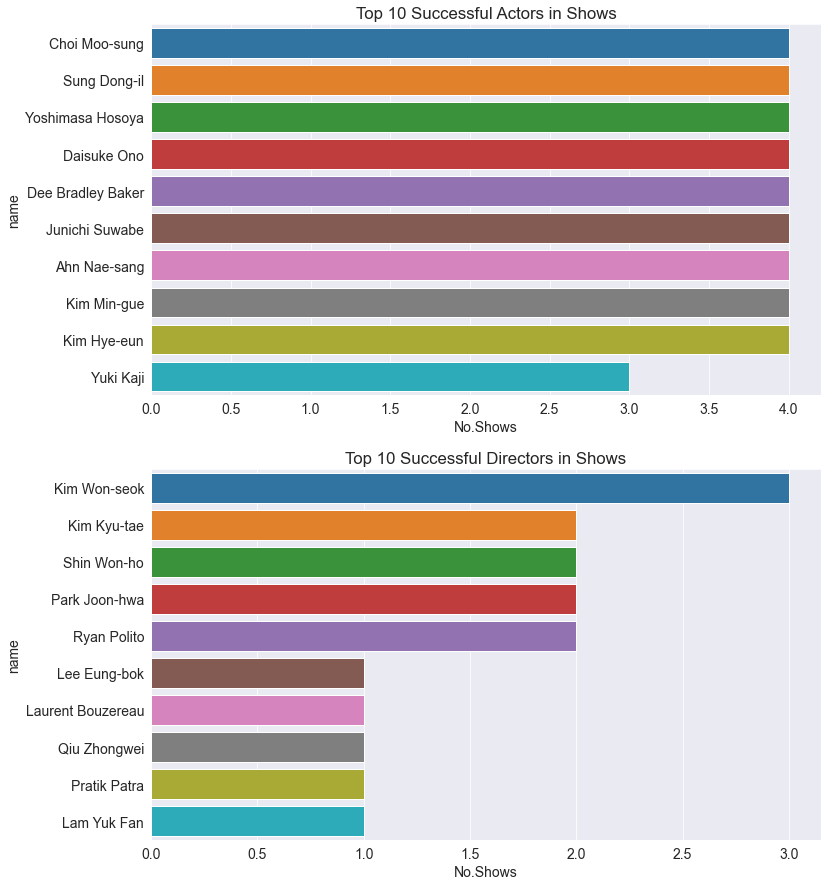

In [159]:
fig,ax=plt.subplots(2,1,figsize=(12,15))
ax[0].set_title('Top 10 Successful Actors in Shows')
ax[1].set_title('Top 10 Successful Directors in Shows')
sns.barplot(x=ssA_df['title'],y=ssA_df.index,ax=ax[0])
sns.barplot(x=ssD_df['title'],y=ssD_df.index,ax=ax[1]);
ax[0].set_xlabel('No.Shows')
ax[1].set_xlabel("No.Shows");

In [170]:
merged_df.to_csv('merged_files.csv')

As the Merged Data frame contains much duplicated data which is not preferabled for model buliding so we consider the Titles data for model bulding

In [171]:
clean_tdf.isna().sum()

id                         0
title                      0
type                       0
description                2
release_year               0
age_certification       2123
runtime                    0
genres                     0
production_countries       0
seasons                    0
imdb_id                    0
imdb_score                 0
imdb_votes                 0
tmdb_popularity            0
tmdb_score                 0
prod_country             111
unique_genre               2
dtype: int64

In [172]:
clean_tdf.duplicated().sum()

0

Here the id and imbd id and are same so we can drop them 

In [174]:
clean_tdf.drop('imdb_id',inplace=True,axis=1)

Here imdb_score are more reliable then tmdb_score so we can drop tmdb_score

In [175]:
clean_tdf.drop('tmdb_score',inplace=True,axis=1)

In [179]:
clean_tdf.shape

(4989, 15)

In [181]:
print("the total null values in age_certification is ",clean_tdf['age_certification'].isna().sum())
print("the percentage of nan values in are_certification is ",clean_tdf['age_certification'].isna().sum()*100/clean_tdf['id'].count())

the total null values in age_certification is  2123
the percentage of nan values in are_certification is  42.55361795951092


Because of the huge percentage of nan values we just drop the column

In [182]:
clean_tdf.drop('age_certification',inplace=True,axis=1)

## Observing the correlation among attributes

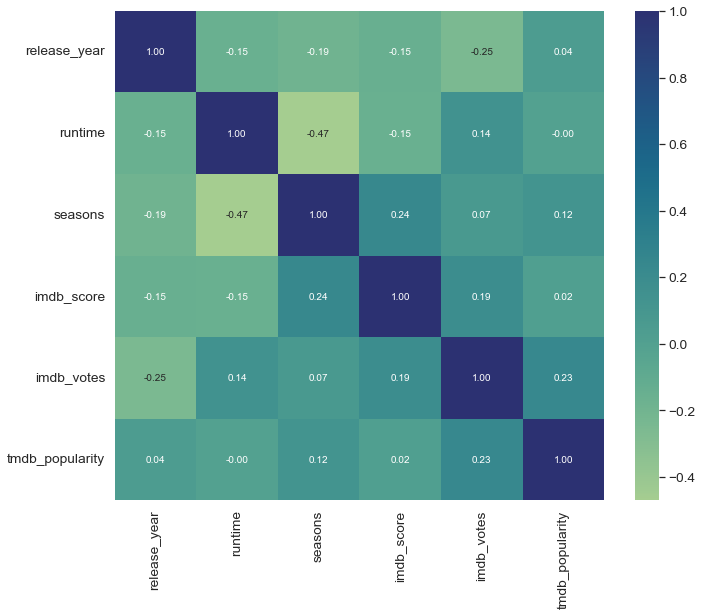

In [184]:
corrmat_data= clean_tdf.corr()

sns.set(font_scale=1.25)

fig,ax= plt.subplots(figsize=(11,9))

hm_data= sns.heatmap(corrmat_data, cbar=True,cmap='crest', annot=True, square=True, fmt=".2f", annot_kws={"size":10}, yticklabels= corrmat_data.index, xticklabels=corrmat_data.index,)

plt.show()

Results:

    1. release_year is least correlated with other attributes as which can be degraded.
    
    2. As seasons and runtime are least correlated to each other because of mixed data of movies and shows.
    
    3. We can see that by increasing in years the popularity for Movies and shows also increasing.

In [187]:
clean_tdf.to_csv('clean_data.csv')